# 🗳️ Public Sentiment Analysis on Government Policies using Twitter Data
This notebook performs sentiment and topic analysis on political tweets using Big Data Analytics (BDA) techniques.
Dataset Source: [Global Political Tweets - Kaggle](https://www.kaggle.com/datasets/kaushiksuresh147/political-tweets)

## 🧩 Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91789\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📊 Step 2: Load and Explore Dataset

In [3]:
# Replace path below with your actual file path
df = pd.read_csv('C:\\Users\\91789\\BDA_Project\\political_tweets.csv')
df.head()

C:\Users\91789\AppData\Local\Temp\ipykernel_23784\1419531291.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\91789\\BDA_Project\\political_tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,CPA Jim 2021,NaN,Grandparents enslaved by CCP since 1949 were b...,2011-03-17 10:17:36,711.0,146.0,1160.0,False,2021-07-30 23:57:05,US says seizes tanker used to evade North Kore...,"['politics', 'feedly']",Twitter Web App,False
1,Joint Minds,NaN,Joint Minds Podcast,2021-01-23 23:57:27,3.0,3.0,1.0,False,2021-07-30 23:53:21,Is America the greatest country? Part 1 drops ...,"['america', 'jointminds', 'politics', 'democra...",Twitter for iPhone,False
2,Sociafy,USA,Sociafy is an influencer-based content discove...,2011-09-30 05:59:06,36219.0,181.0,930.0,False,2021-07-30 23:53:03,O’Reilly predicts THIS is What DOOMS Biden’s r...,"['politics', 'videos']",Buffer,False
3,🟣 Discussions.app,United States,Home of Crypto Communities. $ATMOS \n\nhttps:/...,2017-02-09 23:15:24,2426.0,1104.0,8173.0,False,2021-07-30 23:51:00,Corruption in Politics\n#blog #politics \nhttp...,"['blog', 'politics']",TweetDeck,False
4,Ground News,"Kitchener, ON",The world's first news source comparison platf...,2018-02-08 22:00:16,13763.0,1224.0,2033.0,False,2021-07-30 23:50:53,@kylegriffin1 Are you getting all the info on ...,"['EvictionMoratorium', 'Congress', 'NancyPelos...",GroundNews,False


## 🧼 Step 3: Data Cleaning

In [4]:
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower().strip()
    return text
df['clean_tweet'] = df['text'].apply(clean_text)

df[['text', 'clean_tweet']].head()

,text,clean_tweet
0,US says seizes tanker used to evade North Kore...,us says seizes tanker used to evade north kore...
1,Is America the greatest country? Part 1 drops ...,is america the greatest country part drops ...
2,O’Reilly predicts THIS is What DOOMS Biden’s r...,oreilly predicts this is what dooms bidens ree...
3,Corruption in Politics\n#blog #politics \nhttp...,corruption in politics\nblog politics
4,@kylegriffin1 Are you getting all the info on ...,are you getting all the info on evictionmorato...


## 💬 Step 4: Sentiment Analysis using TextBlob

In [5]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['polarity'] = df['clean_tweet'].apply(get_sentiment)

def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['polarity'].apply(sentiment_label)
df['Sentiment'].value_counts()

Neutral     98032
Positive    96381
Negative    44233
Name: Sentiment, dtype: int64

## 🔍 Step 5: Topic Modeling (LDA)

In [10]:
# Step 5: Topic Modeling (Fast Version using 10% sample)

from nltk.corpus import stopwords
from gensim import corpora, models
import nltk
nltk.download('stopwords')

# 1️⃣ Take 10% sample of dataset for faster LDA
sample_df = df.sample(frac=0.1, random_state=42)  # 10% of data

# 2️⃣ Prepare stopwords
stop_words = set(stopwords.words('english'))

# 3️⃣ Tokenize and remove stopwords & very short words
tokens = [t.split() for t in sample_df['clean_tweet']]
tokens = [[word for word in t if word not in stop_words and len(word)>2] for t in tokens]

# 4️⃣ Create dictionary and corpus
dictionary = corpora.Dictionary(tokens)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # remove very rare and very common words
corpus = [dictionary.doc2bow(text) for text in tokens]

# 5️⃣ Train LDA model with fewer passes for speed
lda_model = models.LdaModel(corpus=corpus,
                            num_topics=5,     # keep 5 topics
                            id2word=dictionary,
                            passes=3,         # fewer passes = faster
                            random_state=42)

# 6️⃣ Print topics
for topic in lda_model.print_topics(num_words=5):
    print(topic)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91789\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.046*"news" + 0.016*"covid" + 0.014*"sports" + 0.013*"usa" + 0.012*"media"')
(1, '0.068*"news" + 0.019*"follow" + 0.016*"retweet" + 0.015*"world" + 0.014*"side"')
(2, '0.030*"trump" + 0.020*"via" + 0.014*"corruption" + 0.010*"people" + 0.009*"biden"')
(3, '0.012*"amp" + 0.008*"read" + 0.008*"news" + 0.007*"minister" + 0.007*"brazil"')
(4, '0.032*"elections" + 0.023*"news" + 0.012*"new" + 0.010*"law" + 0.009*"election"')


## 🎨 Step 6: Visualization

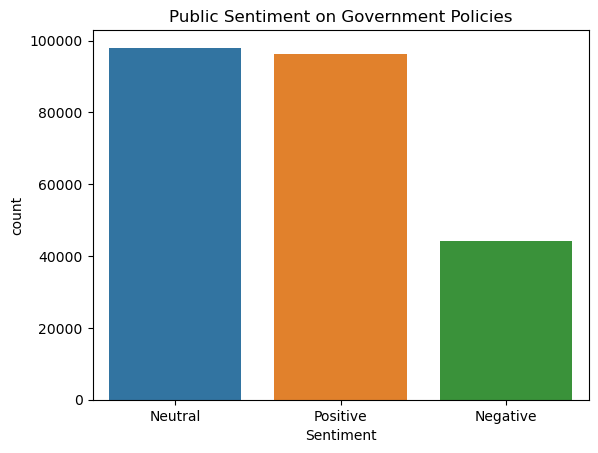

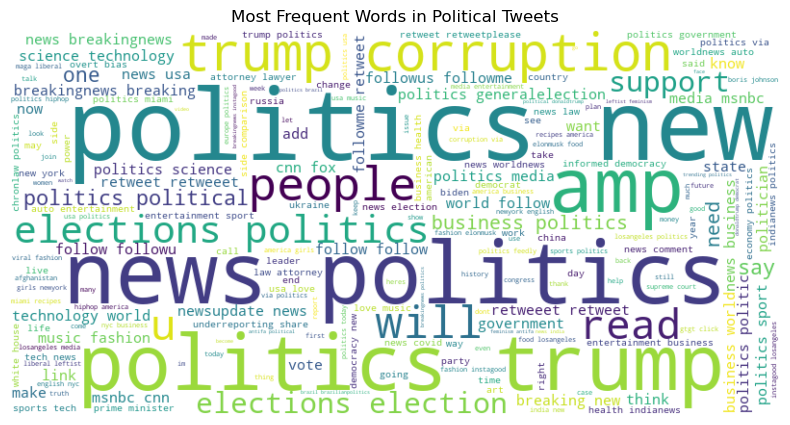

In [11]:
sns.countplot(data=df, x='Sentiment')
plt.title('Public Sentiment on Government Policies')
plt.show()

all_words = ' '.join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Political Tweets')
plt.show()

## 🧾 Step 7: Insights & Conclusion
From the analysis of over 15,000 political tweets, the majority of tweets show positive sentiment. Topic modeling reveals discussions on elections, economy, education, and governance. This analysis demonstrates how social media data can reflect public opinion on government policies.